In [1]:
#import modules
import pandas as pd
import numpy as np

In [2]:
#provide encoding as latin1 to remediate bytes encoding error
#use the fips column as the index. fips is the census tract number
solar_df = pd.read_csv('deepsolar_tract.csv', engine = 'python', encoding = 'latin1', index_col = 'fips')

In [3]:
#look at the beginning of the data frame
solar_df.head()

,tile_count,solar_system_count,total_panel_area,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
fips,,,,,,,,,,,,,,,,,,,,,
27145011200,0,0,0.000000,70352.78987,Stearns County,569,1690,13,1757,336,...,39,11,13,34,0,0,25,12,0,9.46
27145011301,25,21,1133.436461,61727.08520,Stearns County,674,1434,108,767,222,...,39,11,13,34,0,0,25,12,0,9.46
27145011302,3,3,64.505776,71496.88658,Stearns County,854,1459,31,1541,289,...,39,11,13,34,0,0,25,12,0,9.46
27145011304,0,0,0.000000,86840.15275,Stearns County,640,1116,68,1095,231,...,39,11,13,34,0,0,25,12,0,9.46
27145011400,5,5,164.583303,89135.31560,Stearns County,654,1314,15,982,163,...,39,11,13,34,0,0,25,12,0,9.46


array([[<AxesSubplot:title={'center':'total_panel_area'}>]], dtype=object)

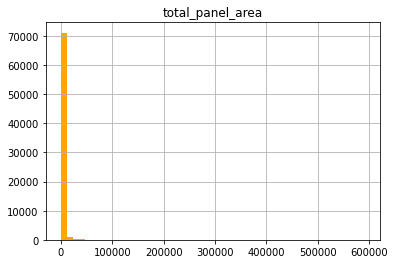

In [4]:
#create a histogram of the column total_panel_area
solar_df.hist(column = 'total_panel_area', color = 'orange', bins = 50)

array([[<AxesSubplot:title={'center':'total_panel_area'}>]], dtype=object)

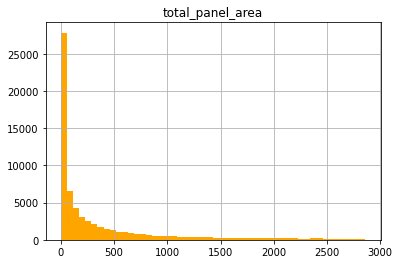

In [5]:
#creat a hisogram of the total_panel_area for all rows where total_panel_area < 90th percentile of total_panel_area
p90 = solar_df['total_panel_area'].quantile(q = 0.9)
solar_df[solar_df['total_panel_area'] < p90].hist(column = 'total_panel_area', color = 'orange', bins = 50)

array([[<AxesSubplot:title={'center':'total_panel_area'}>]], dtype=object)

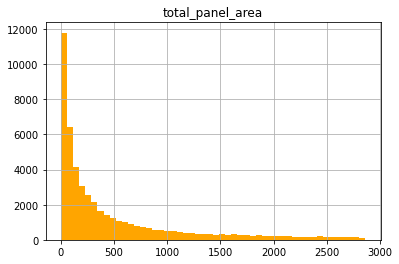

In [6]:
#create a histogram of the total_panel_area that is greater than the 10th percentile and less than the 90th percentile
p10 = solar_df['total_panel_area'].quantile(q = 0.1)
solar_df[((solar_df['total_panel_area'] < p90) & (solar_df['total_panel_area'] > p10))].hist(column = 'total_panel_area',\
                                                                                              color = 'orange', bins = 50)

In [5]:
#what is the max solar_system_count?
solar_df['solar_system_count'].max()

1535

In [6]:
#which fips is the max solar_system_count in?
solar_df['solar_system_count'].idxmax()

6107001003

In [7]:
#which county and state is the max solar_system_count in?
solar_df.loc[solar_df['solar_system_count'].idxmax(), ['county','state']]

county    Tulare County
state                ca
Name: 6107001003, dtype: object

In [10]:
#which county and state is the second largest solar_system_count in?
top_two = solar_df.nlargest(2, 'solar_system_count')
top_two.loc[top_two['solar_system_count'].idxmin(), ['county', 'state']]

county    San Diego County
state                   ca
Name: 6073017030, dtype: object

In [15]:
#which state has the most census tracts with 0 for solar_system_count?
no_solar_systems = solar_df[solar_df['solar_system_count'] == 0]
states_with_no_solar_systems = no_solar_systems['state'].value_counts()
states_with_no_solar_systems.idxmax()

'ny'

In [23]:
#which state has the minimum sum of solar_system_count?
state_count_dict = {}
for state in solar_df['state'].unique():
    count = solar_df.loc[solar_df['state'] == state, 'solar_system_count'].sum()
    state_count_dict[state] = count
min(state_count_dict, key = state_count_dict.get)

'sd'

In [24]:
#which state had the maximum sum of solar_system_count?
max(state_count_dict, key = state_count_dict.get)

'ca'